In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib as mpl

from os.path import join

plt.style.use(["seaborn", "thesis"])

In [19]:
plt.rc("figure", figsize=(8,4))

# Molecule 

In [5]:
from SCFInitialGuess.utilities.dataset import Molecule

angle_HCC = 121.3/180 *np.pi
distance_CC = 1.339
distance_CH = 1.087

mol = Molecule(
    species=["C", "C", "H", "H", "H", "H"],
    positions=[
        [ 0.00000,       0.00000,        0.00000],
        [ distance_CC  ,       0.00000,        0.00000],
        [ distance_CH * np.cos(angle_HCC), distance_CH * np.sin(angle_HCC), 0.00000],
        [ distance_CH * np.cos(2*np.pi - angle_HCC), distance_CH * np.sin(2*np.pi - angle_HCC), 0.00000],
        [ distance_CC + distance_CH * np.cos(np.pi - angle_HCC), distance_CH * np.sin(np.pi - angle_HCC), 0.00000],
        [ distance_CC + distance_CH * np.cos(- np.pi + angle_HCC), distance_CH * np.sin(- np.pi + angle_HCC), 0.00000]
    ]
)

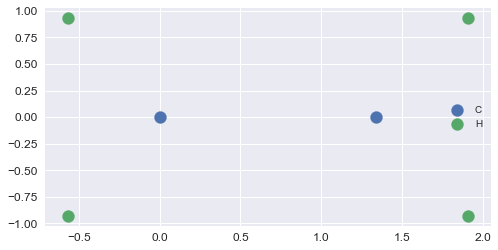

In [6]:
pos = np.array(mol.positions)
plt.scatter(pos[:2, 0], pos[:2, 1], label="C")
plt.scatter(pos[2:, 0], pos[2:, 1], label="H")
plt.legend()

## Radial Model 

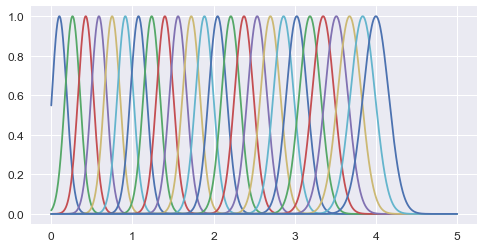

In [7]:
from SCFInitialGuess.descriptors.utilities import plot_normal_model
from SCFInitialGuess.descriptors.models import make_uniform
from SCFInitialGuess.descriptors.coordinate_descriptors import Gaussians

r_model = model = make_uniform(25, 5, eta_max=60, eta_min=20)

radial = Gaussians(*r_model)

plot_normal_model(r_model, np.linspace(0, 5, 1000))

## Angular model 

In [8]:
from SCFInitialGuess.descriptors.coordinate_descriptors import SPHAngularDescriptor

angular = SPHAngularDescriptor(5)

# No weighting 

##  No CutOff 

In [9]:
from SCFInitialGuess.descriptors.cutoffs import ConstantCutoff
from SCFInitialGuess.descriptors.high_level import NonWeighted

descriptor_none = NonWeighted(
    radial_descriptor=radial,
    angular_descriptor=angular,
    cut_off=ConstantCutoff()
)

## Behler 1 

In [10]:
from SCFInitialGuess.descriptors.cutoffs import BehlerCutoff1
from SCFInitialGuess.descriptors.high_level import NonWeighted

descriptor_B5_none = NonWeighted(
    radial_descriptor=radial,
    angular_descriptor=angular,
    cut_off=BehlerCutoff1(5)
)

### Behler1(2.5) 

In [11]:
from SCFInitialGuess.descriptors.cutoffs import BehlerCutoff1
from SCFInitialGuess.descriptors.high_level import NonWeighted

descriptor_B2dot5_none = NonWeighted(
    radial_descriptor=radial,
    angular_descriptor=angular,
    cut_off=BehlerCutoff1(2.5)
)

# No Cutoff/Weighted By Z 

### No CutOff 

In [12]:
from SCFInitialGuess.descriptors.cutoffs import ConstantCutoff
from SCFInitialGuess.descriptors.high_level import AtomicNumberWeighted

descriptor_NoCO_Z = AtomicNumberWeighted(
    radial_descriptor=radial,
    angular_descriptor=angular,
    cut_off=ConstantCutoff()
)

### Behler 1 

In [13]:
from SCFInitialGuess.descriptors.cutoffs import BehlerCutoff1
from SCFInitialGuess.descriptors.high_level import AtomicNumberWeighted

descriptor_B5_Z = AtomicNumberWeighted(
    radial_descriptor=radial,
    angular_descriptor=angular,
    cut_off=BehlerCutoff1(5)
)

### Behler1(2.5)

In [14]:
from SCFInitialGuess.descriptors.cutoffs import BehlerCutoff1
from SCFInitialGuess.descriptors.high_level import AtomicNumberWeighted

descriptor_B2dot5_Z = AtomicNumberWeighted(
    radial_descriptor=radial,
    angular_descriptor=angular,
    cut_off=BehlerCutoff1(2.5)
)

# No Cutoff/Weightes by $\chi$ 

In [15]:
from SCFInitialGuess.descriptors.cutoffs import ConstantCutoff
from SCFInitialGuess.descriptors.high_level import ElectronegativityWeighted

descriptor_NoCO_Chi = ElectronegativityWeighted(
    radial_descriptor=radial,
    angular_descriptor=angular,
    cut_off=ConstantCutoff()
)

### Behler1(5) 

In [16]:
from SCFInitialGuess.descriptors.cutoffs import ConstantCutoff
from SCFInitialGuess.descriptors.high_level import ElectronegativityWeighted

descriptor_B5_Chi = ElectronegativityWeighted(
    radial_descriptor=radial,
    angular_descriptor=angular,
    cut_off=BehlerCutoff1(5)
)

### Behler1(2.5) 

In [17]:
from SCFInitialGuess.descriptors.cutoffs import ConstantCutoff
from SCFInitialGuess.descriptors.high_level import ElectronegativityWeighted

descriptor_B2dot5_Chi = ElectronegativityWeighted(
    radial_descriptor=radial,
    angular_descriptor=angular,
    cut_off=BehlerCutoff1(2.5)
)

# Plots 

### No CufOff 

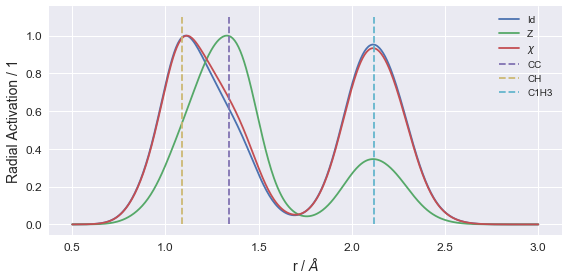

In [20]:
from SCFInitialGuess.descriptors.utilities import plot_radial_activation
from SCFInitialGuess.descriptors.cutoffs import behler_cutoff_1

r = np.linspace(0.5, 3, 500)

plot_radial_activation(r, descriptor_none, mol, "Id")
plot_radial_activation(r, descriptor_NoCO_Z, mol, "Z")
plot_radial_activation(r, descriptor_NoCO_Chi, mol, "$\chi$")


#plot_radial_activation(r, descriptor_B5_none, mol, "Behler1(5)-None")
#plot_radial_descriptor(r, descriptor_unifrom_radial_250, "Unif-250")



plt.plot([distance_CC]*2, [0, 1.1], "--", label="CC")
plt.plot([distance_CH]*2, [0, 1.1], "--", label="CH")
plt.plot([
    np.sqrt(distance_CH**2 + distance_CC**2 - 2*distance_CH*distance_CC*np.cos(angle_HCC))
]*2, [0, 1.1], "--", label="C1H3")


#plt.plot(r, behler_cutoff_1(r, 5), "-.")


plt.xlabel("r / $\AA$")
plt.ylabel("Radial Activation / 1")

plt.legend()
plt.tight_layout()

plt.savefig("/home/jo/Repos/MastersThesis/GenericDescriptors/figures/WeightingActivation.pdf")


### Behler5 

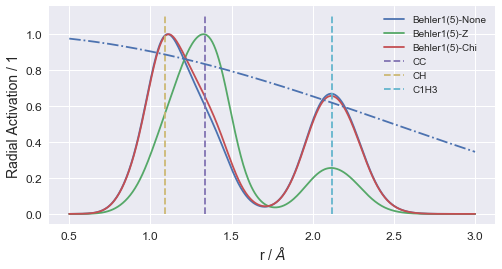

In [17]:
from SCFInitialGuess.descriptors.utilities import plot_radial_activation
from SCFInitialGuess.descriptors.cutoffs import behler_cutoff_1

r = np.linspace(0.5, 3, 500)


plot_radial_activation(r, descriptor_B5_none, mol, "Behler1(5)-None")
plot_radial_activation(r, descriptor_B5_Z, mol, "Behler1(5)-Z")
plot_radial_activation(r, descriptor_B5_Chi, mol, "Behler1(5)-Chi")



plt.plot([distance_CC]*2, [0, 1.1], "--", label="CC")
plt.plot([distance_CH]*2, [0, 1.1], "--", label="CH")
plt.plot([
    np.sqrt(distance_CH**2 + distance_CC**2 - 2*distance_CH*distance_CC*np.cos(angle_HCC))
]*2, [0, 1.1], "--", label="C1H3")


plt.plot(r, behler_cutoff_1(r, 5), "-.")


plt.xlabel("r / $\AA$")
plt.ylabel("Radial Activation / 1")

plt.legend()

#plt.savefig("/home/jo/Repos/MastersThesis/AtomicBlocks/figures/RadialActivation.pdf")


## Behler2.5

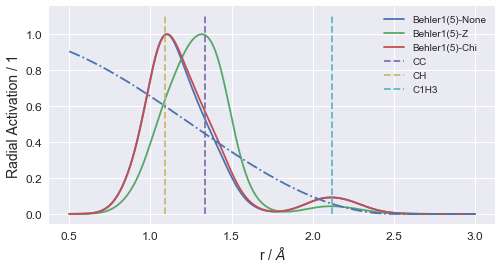

In [18]:
from SCFInitialGuess.descriptors.utilities import plot_radial_activation
from SCFInitialGuess.descriptors.cutoffs import behler_cutoff_1

r = np.linspace(0.5, 3, 500)


plot_radial_activation(r, descriptor_B2dot5_none, mol, "Behler1(5)-None")
plot_radial_activation(r, descriptor_B2dot5_Z, mol, "Behler1(5)-Z")
plot_radial_activation(r, descriptor_B2dot5_Chi, mol, "Behler1(5)-Chi")



plt.plot([distance_CC]*2, [0, 1.1], "--", label="CC")
plt.plot([distance_CH]*2, [0, 1.1], "--", label="CH")
plt.plot([
    np.sqrt(distance_CH**2 + distance_CC**2 - 2*distance_CH*distance_CC*np.cos(angle_HCC))
]*2, [0, 1.1], "--", label="C1H3")


plt.plot(r, behler_cutoff_1(r, 2.5), "-.")


plt.xlabel("r / $\AA$")
plt.ylabel("Radial Activation / 1")

plt.legend()

#plt.savefig("/home/jo/Repos/MastersThesis/AtomicBlocks/figures/RadialActivation.pdf")


# Actual Density

elektronendichte entlang der x-achse, nicht das gleiche wie radiale Aktivierung!!!

In [19]:
from pyscf.scf import RHF

mf = RHF(mol.get_pyscf_molecule())
mf.kernel()
dm = mf.make_rdm1()

#dm = hf.init_guess_by_atom(mol.get_pyscf_molecule())

converged SCF energy = -78.0552688365953


In [20]:
def density_cut_for_points(mol, dm, x, y=[0], z=[0]):
    from scipy.constants import physical_constants
    from pyscf import lib
    from pyscf.dft import gen_grid, numint
    
    # needed for conversion as x,y are in bohr for some reason
    a0 = physical_constants["Bohr radius"][0]

    nx = len(x)
    ny = len(y)
    nz = len(z)

    coord = mol.atom_coords()
    box = np.max(coord,axis=0) - np.min(coord,axis=0) + 6
    boxorig = np.min(coord,axis=0) - 3
    #xs = np.arange(nx) * (box[0]/nx)
    xs = np.array(x)
    #ys = np.arange(ny) * (box[1]/ny)
    ys = np.array(y)
    #zs = np.array([z_value]) 
    zs = np.array(z)
    
    
    coords = lib.cartesian_prod([xs,ys,zs])
    coords = np.asarray(coords, order='C')# - (-boxorig)

    ngrids = nx * ny * nz
    blksize = min(8000, ngrids)
    rho = np.empty(ngrids)
    ao = None
    for ip0, ip1 in gen_grid.prange(0, ngrids, blksize):
        ao = numint.eval_ao(mol, coords[ip0:ip1], out=ao)
        rho[ip0:ip1] = numint.eval_rho(mol, ao, dm)
    rho = rho.reshape(nx,ny)


    return rho.T, xs*a0, ys*a0, zs*a0 #, (xs + boxorig[0]) * a0, (ys + boxorig[1]) * a0

In [21]:
x = np.linspace(0, 10, 100)
density_cut, x, y, z = density_cut_for_points(mol.get_pyscf_molecule(), dm, x)

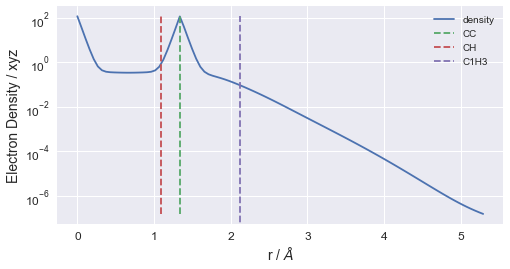

In [23]:

plt.semilogy(x*1e10, density_cut.reshape(-1), label="density")


zmax = np.max(density_cut)
z0 = np.min(density_cut)

plt.plot([distance_CC]*2, [z0, zmax], "--", label="CC")
plt.plot([distance_CH]*2, [z0, zmax], "--", label="CH")
plt.plot([
    np.sqrt(distance_CH**2 + distance_CC**2 - 2*distance_CH*distance_CC*np.cos(angle_HCC))
]*2, [0, zmax], "--", label="C1H3")


plt.ylabel("Electron Density / xyz")
plt.xlabel("r / $\AA$")


plt.legend()